<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


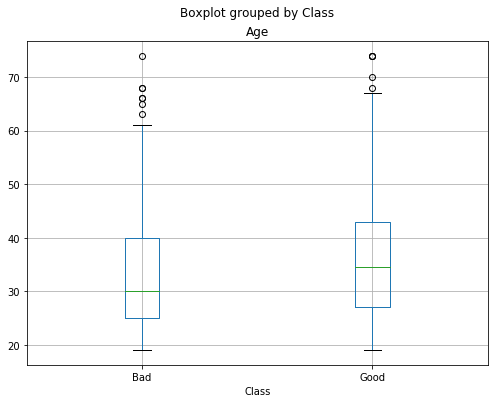

In [2]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
% matplotlib inline

credit_train.boxplot('Age', by = 'Class', figsize = (8, 6))
# Comment whether age is a good predictor
# From visual inspection there is a difference in the distrobution of age for our two classes of credit worthiness,
# evidence supporting the hyothesis that age is a predictive factor of credit worthiness.

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [3]:
# Command:
credit_train.groupby('Class')[['CreditHistory.Critical','Class']].agg({'Class': 'count', 'CreditHistory.Critical': 'sum'})
# One sentence summary:
# Class 0: 15%
# Class 1: 34%
# Occurence of a critical credit history is more than twice as likely for credit worthy customers.

,CreditHistory.Critical,Class
Class,,
Bad,38,246
Good,189,562


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [4]:
def encode_target(row):
    if row['Class'] == 'Good':
        return 1
    else:
        return 0
    
credit_train['Class'] = credit_train.apply(encode_target, axis=1)
credit_test['Class'] = credit_test.apply(encode_target, axis=1)

<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [5]:
from sklearn.linear_model import LogisticRegression

y = credit_train['Class']
X = credit_train.iloc[:,1:]

clf = LogisticRegression()

clf.fit(X, y)

# print intercept
print('Intercept: {}'.format(clf.intercept_[0]))
# print coeficients
coef = {k: v for k, v in zip(X.columns, clf.coef_.tolist()[0])}
for attribute, value in coef.items():
    print('{} : {}'.format(attribute, value))

Intercept: 1.5501458377476558
InstallmentRatePercentage : -0.18053410155033234
Duration : -0.02400870168598653
CreditHistory.ThisBank.AllPaid : 0.022020506814167746
NumberPeopleMaintenance : 0.1414265775350854
CheckingAccountStatus.lt.0 : -1.852377122412594
ResidenceDuration : 0.06392072355771736
CreditHistory.PaidDuly : 0.9748631578831246
Telephone : -0.27907732571364263
ForeignWorker : -0.2657787645908318
CheckingAccountStatus.0.to.200 : -1.1397340642784468
CheckingAccountStatus.gt.200 : -0.6738676155794289
CreditHistory.Critical : 1.5019778329509028
Amount : -5.766415999375522e-05
NumberExistingCredits : 0.042720320616395045
Age : 0.01504166433943895
CreditHistory.Delay : 0.7416339148851194


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [6]:
yhat = clf.predict(credit_test.iloc[:,1:])
ytest = credit_test.iloc[:,:1]

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, yhat)

array([[ 18,  36],
       [ 23, 115]])

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [7]:
# Command that outputs acccuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yhat)

0.6927083333333334

<h3>Q.7. Generate the ROC curve.</h3>

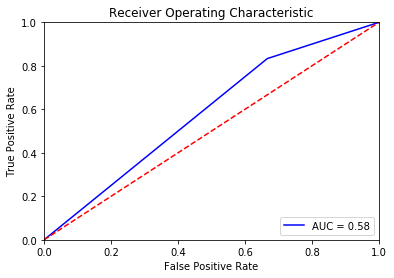

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(ytest, yhat)
roc_auc = auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [12]:
# Command(s):
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yhat)

0.5833333333333335

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf2 = LinearDiscriminantAnalysis()
clf2.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [13]:
yhat2 = clf.predict(credit_test.iloc[:,1:])
accuracy_score(ytest, yhat2)

0.6927083333333334